<a href="https://colab.research.google.com/github/lakuna2/A1_007_PostTest1/blob/main/Posttest_2_Aulia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Nama : Aulia Ade Putri

> Nim : 2109116007

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

# (1) Apriori

Buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut

In [3]:
df = pd.read_excel("market_basket.xlsx",sheet_name="dataset_market_basket")
# Untuk baca Dataset_Temp - sheet 1
df

,Whole Milk,Pastry,Salty Snack,Sausage,semi-finished bread,Yougurt,Soda,pickled vegetables,canned beer,misc. beverages,...,sugar,butter milk,specialty chocolate,white bread,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
df.sum()

Whole Milk             5
Pastry                 1
Salty Snack            1
Sausage                4
semi-finished bread    1
Yougurt                1
Soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             3
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
white bread            1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [5]:
from itertools import permutations #Library untuk buat kombinasi barang

# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

[('Whole Milk', 'Pastry'),
 ('Whole Milk', 'Salty Snack'),
 ('Whole Milk', 'Sausage'),
 ('Whole Milk', 'semi-finished bread'),
 ('Whole Milk', 'Yougurt'),
 ('Whole Milk', 'Soda'),
 ('Whole Milk', 'pickled vegetables'),
 ('Whole Milk', 'canned beer'),
 ('Whole Milk', 'misc. beverages'),
 ('Whole Milk', 'hygiene articles'),
 ('Whole Milk', 'rolls/buns'),
 ('Whole Milk', 'frankfurter'),
 ('Whole Milk', 'whipped/sour cream'),
 ('Whole Milk', 'curd'),
 ('Whole Milk', 'beef'),
 ('Whole Milk', 'butter'),
 ('Whole Milk', 'frozen vegetables'),
 ('Whole Milk', 'other vegetables'),
 ('Whole Milk', 'tropical fruit'),
 ('Whole Milk', 'sugar'),
 ('Whole Milk', 'butter milk'),
 ('Whole Milk', 'specialty chocolate'),
 ('Whole Milk', 'white bread'),
 ('Whole Milk', 'frozen meals'),
 ('Whole Milk', 'dental care'),
 ('Whole Milk', 'root vegetables'),
 ('Whole Milk', 'detergent'),
 ('Whole Milk', 'dish cleaner'),
 ('Whole Milk', 'cling film/bags'),
 ('Pastry', 'Whole Milk'),
 ('Pastry', 'Salty Snack'),
 (

In [6]:
# Filter yang ada item kombinasi yang muncul aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('Whole Milk', 'Pastry'),
 ('Whole Milk', 'Salty Snack'),
 ('Whole Milk', 'Sausage'),
 ('Whole Milk', 'semi-finished bread'),
 ('Whole Milk', 'Yougurt'),
 ('Whole Milk', 'Soda'),
 ('Whole Milk', 'rolls/buns'),
 ('Whole Milk', 'butter'),
 ('Pastry', 'Whole Milk'),
 ('Pastry', 'Salty Snack'),
 ('Salty Snack', 'Whole Milk'),
 ('Salty Snack', 'Pastry'),
 ('Sausage', 'Whole Milk'),
 ('Sausage', 'semi-finished bread'),
 ('Sausage', 'Yougurt'),
 ('Sausage', 'hygiene articles'),
 ('Sausage', 'rolls/buns'),
 ('semi-finished bread', 'Whole Milk'),
 ('semi-finished bread', 'Sausage'),
 ('semi-finished bread', 'Yougurt'),
 ('Yougurt', 'Whole Milk'),
 ('Yougurt', 'Sausage'),
 ('Yougurt', 'semi-finished bread'),
 ('Soda', 'Whole Milk'),
 ('Soda', 'pickled vegetables'),
 ('Soda', 'frankfurter'),
 ('Soda', 'whipped/sour cream'),
 ('pickled vegetables', 'Soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'Sausage'),
 ('rolls/buns', 'Whole Milk'),
 (

In [7]:
# Menghitung banyaknya data pada setiap kombinasi
hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('Whole Milk', 'Pastry')": 1,
 "('Whole Milk', 'Salty Snack')": 1,
 "('Whole Milk', 'Sausage')": 2,
 "('Whole Milk', 'semi-finished bread')": 1,
 "('Whole Milk', 'Yougurt')": 1,
 "('Whole Milk', 'Soda')": 1,
 "('Whole Milk', 'rolls/buns')": 1,
 "('Whole Milk', 'butter')": 1,
 "('Pastry', 'Whole Milk')": 1,
 "('Pastry', 'Salty Snack')": 1,
 "('Salty Snack', 'Whole Milk')": 1,
 "('Salty Snack', 'Pastry')": 1,
 "('Sausage', 'Whole Milk')": 2,
 "('Sausage', 'semi-finished bread')": 1,
 "('Sausage', 'Yougurt')": 1,
 "('Sausage', 'hygiene articles')": 1,
 "('Sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'Whole Milk')": 1,
 "('semi-finished bread', 'Sausage')": 1,
 "('semi-finished bread', 'Yougurt')": 1,
 "('Yougurt', 'Whole Milk')": 1,
 "('Yougurt', 'Sausage')": 1,
 "('Yougurt', 'semi-finished bread')": 1,
 "('Soda', 'Whole Milk')": 1,
 "('Soda', 'pickled vegetables')": 1,
 "('Soda', 'frankfurter')": 1,
 "('Soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'Soda')": 1,
 

In [9]:
print("Nilai Support")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

Nilai Support
('Whole Milk', 'Pastry') support = 5.263157894736842%
('Whole Milk', 'Salty Snack') support = 5.263157894736842%
('Whole Milk', 'Sausage') support = 10.526315789473683%
('Whole Milk', 'semi-finished bread') support = 5.263157894736842%
('Whole Milk', 'Yougurt') support = 5.263157894736842%
('Whole Milk', 'Soda') support = 5.263157894736842%
('Whole Milk', 'rolls/buns') support = 5.263157894736842%
('Whole Milk', 'butter') support = 5.263157894736842%
('Pastry', 'Whole Milk') support = 5.263157894736842%
('Pastry', 'Salty Snack') support = 5.263157894736842%
('Salty Snack', 'Whole Milk') support = 5.263157894736842%
('Salty Snack', 'Pastry') support = 5.263157894736842%
('Sausage', 'Whole Milk') support = 10.526315789473683%
('Sausage', 'semi-finished bread') support = 5.263157894736842%
('Sausage', 'Yougurt') support = 5.263157894736842%
('Sausage', 'hygiene articles') support = 5.263157894736842%
('Sausage', 'rolls/buns') support = 10.526315789473683%
('semi-finished bre

In [10]:

print("--Nilai Confidence--")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

--Nilai Confidence--
Whole Milk->Pastry  Confidence = 20.0%
Whole Milk->Salty Snack  Confidence = 20.0%
Whole Milk->Sausage  Confidence = 40.0%
Whole Milk->semi-finished bread  Confidence = 20.0%
Whole Milk->Yougurt  Confidence = 20.0%
Whole Milk->Soda  Confidence = 20.0%
Whole Milk->rolls/buns  Confidence = 20.0%
Whole Milk->butter  Confidence = 20.0%
Pastry->Whole Milk  Confidence = 100.0%
Pastry->Salty Snack  Confidence = 100.0%
Salty Snack->Whole Milk  Confidence = 100.0%
Salty Snack->Pastry  Confidence = 100.0%
Sausage->Whole Milk  Confidence = 50.0%
Sausage->semi-finished bread  Confidence = 25.0%
Sausage->Yougurt  Confidence = 25.0%
Sausage->hygiene articles  Confidence = 25.0%
Sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->Whole Milk  Confidence = 100.0%
semi-finished bread->Sausage  Confidence = 100.0%
semi-finished bread->Yougurt  Confidence = 100.0%
Yougurt->Whole Milk  Confidence = 100.0%
Yougurt->Sausage  Confidence = 100.0%
Yougurt->semi-finished bread  Conf

#(2) KNN

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

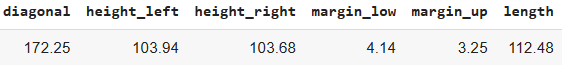
<!-- 1412 -->

In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

In [45]:
df = pd.read_csv("deteksi_uang_palsu.csv")
# Untuk baca Dataset_Temp - sheet 1
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


## Membuat Tabel Jarak

In [46]:
# import library numpy
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df['distance'] = np.sqrt(
    (df['diagonal'] - new_data['diagonal'].values[0])**2
    + (df['height_left'] - new_data['height_left'].values[0])**2
    + (df['height_right'] - new_data['height_right'].values[0])**2
    + (df['margin_low'] - new_data['margin_low'].values[0])**2
    + (df['margin_up'] - new_data['margin_up'].values[0])**2
    + (df['length'] - new_data['length'].values[0])**2
)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df['distance'])

Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


## Menambahkoan Kolom Jarak

In [47]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

## Mengurutkan Data dari yang Terkecil ke yang Terbesar

In [48]:
# Mengurutkan data dari kecil ke besar
sorted_data = df.sort_values('distance')

# Menentukan nilai k
k = int(np.sqrt(len(df)))

# Menentukan data terdekat
data_terdekat = sorted_data.head(k)

# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


## Menentukan Hasil Prediksi Berdasarkan label terbanyak

In [49]:
print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True \n")

# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df.drop(columns=['is_genuine','distance'],axis=1)
y_train = df['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 

Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True


# (3) Analisis

> Nama : Aulia Ade Putri

> Nim : 2109116007

> Judul : Bank Marketing


## Business Understanding

Bank Marketing Dataset adalah kumpulan data yang berisi informasi tentang kampanye pemasaran langsung bank, yang menggunakan telepon sebagai media komunikasi. Dataset ini mencakup informasi tentang pelanggan, seperti usia, pekerjaan, pendapatan, dan riwayat kredit, serta informasi tentang kampanye pemasaran, seperti jumlah panggilan, durasi panggilan, dan hasil panggilan.

Tujuan dari dataset ini adalah untuk memprediksi apakah pelanggan akan menyetujui atau menolak tawaran deposito berjangka yang disediakan oleh bank dalam kampanye pemasaran. Hal ini dapat membantu bank untuk mengoptimalkan kampanye pemasaran mereka dengan menargetkan pelanggan yang lebih mungkin untuk menyetujui tawaran deposito berjangka dan mengurangi biaya kampanye yang tidak perlu.

Dalam konteks bisnis, pemahaman dataset ini membantu bank dalam mengembangkan strategi pemasaran yang efektif dan efisien dengan menargetkan pelanggan yang tepat. Analisis data dari dataset ini juga dapat membantu bank untuk memahami profil pelanggan yang lebih mungkin menyetujui tawaran deposito berjangka, sehingga mereka dapat menyesuaikan produk dan layanan mereka untuk memenuhi kebutuhan dan preferensi pelanggan.

## Data Understanding

### Collect Data

Sumber Data : https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset



### Penjelasan Setiap kolom Dataset Bank Marketing

1. Age: usia pelanggan (numerik)
2. Job: jenis pekerjaan pelanggan (kategorik: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
3. Marital: status pernikahan pelanggan (kategorik: married, divorced, single)
4. Education: tingkat pendidikan pelanggan (kategorik: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
5. Default: apakah pelanggan memiliki riwayat kredit bermasalah (kategorik: yes, no, unknown)
6. Balance: Merupakan variabel numerik yang menunjukkan saldo rata-rata tahunan dari pelanggan pada bank tersebut. Saldo ini termasuk semua jenis aset dan kewajiban, seperti tabungan, deposito, pinjaman, dan hipotek. Variabel ini dapat memberikan gambaran tentang kondisi keuangan pelanggan dan mempengaruhi keputusan pelanggan dalam menyetujui tawaran deposito berjangka.
7. Housing: apakah pelanggan memiliki pinjaman perumahan (kategorik: yes, no, unknown)
8. Loan: apakah pelanggan memiliki pinjaman pribadi (kategorik: yes, no, unknown)
9. Contact: jenis kontak yang digunakan untuk berkomunikasi dengan pelanggan (kategorik: cellular, telephone)
10. Day: Merupakan variabel numerik yang menunjukkan hari dalam sebulan saat panggilan terakhir dilakukan dalam kampanye pemasaran tersebut. 
11. Month: bulan saat kampanye pemasaran dilakukan (kategorik: jan, feb, mar, ..., nov, dec)
12. Duration: durasi panggilan terakhir dalam detik (numerik)
13. Campaign: jumlah panggilan yang dilakukan selama kampanye pemasaran untuk pelanggan ini (numerik)
14. Pdays: jumlah hari sejak pelanggan terakhir kali dihubungi dalam kampanye pemasaran sebelumnya (numerik, -1 berarti pelanggan belum pernah dihubungi sebelumnya)
15. Previous: jumlah panggilan yang dilakukan sebelum kampanye pemasaran saat ini untuk pelanggan ini (numerik)
16. Poutcome: hasil kampanye pemasaran sebelumnya untuk pelanggan ini (kategorik: failure, nonexistent, success)
17. Deposit: apakah pelanggan akan menyetujui tawaran deposito berjangka (kategorik: yes, no)

Variabel target dari dataset ini adalah "y", yaitu apakah pelanggan akan menyetujui tawaran deposito berjangka atau tidak. Variabel ini merupakan variabel kategorik yang memungkinkan penggunaan teknik klasifikasi untuk memprediksi keputusan pelanggan.

In [33]:
df5 = pd.read_csv('bank.csv')
df5
# Mendeteksi mana yang penyakit jantung
# Jelaskan tabel ini tentang apa

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [34]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [35]:
df5.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


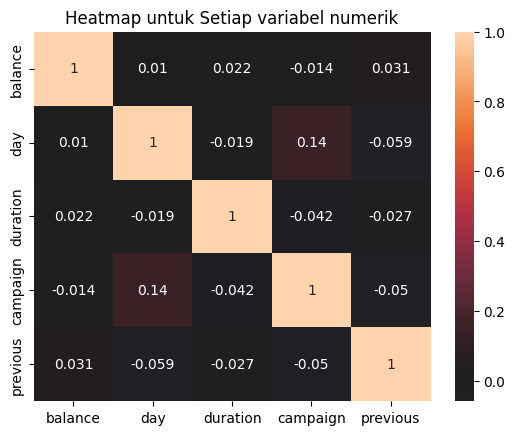

In [36]:
sns.heatmap(
    df5[['balance', 'day', 'duration', 'campaign', 'previous']].corr(),
    annot=True,
    center=0,
);
plt.title('Heatmap untuk Setiap variabel numerik')
plt.show()

#### Visualisasi Comparison
Visualisasi Comparison atau Visualisasi data perbandingan berfungsi untuk membandingkan nilai antara variabel satu dengan lainnya. Selain itu, ini juga berguna untuk menemukan nilai tertinggi atau terendah dari data, dan membandingkan beberapa kategori dalam satu variabel data, seperti yang dilihat pada diagram diatas.

<Axes: xlabel='housing', ylabel='count'>

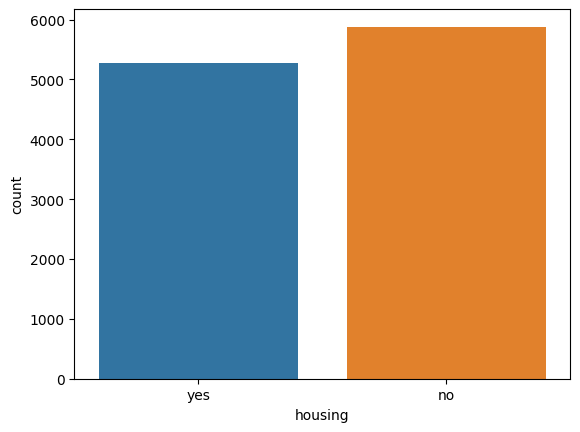

In [37]:
# Buatlah visualisasi yang menampilkan berapa banyak yang housing dan tidak
sns.countplot(data=df5,x="housing")

<Axes: xlabel='count', ylabel='job'>

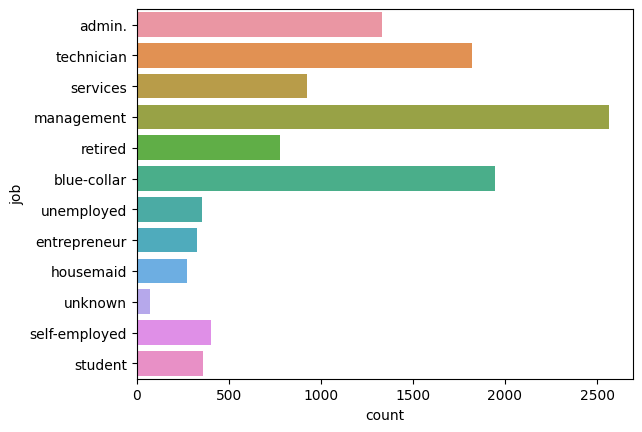

In [38]:
# Buatlah visualisasi yang menampilkan berapa banyak Job berdasarkan kategori-kategorinya 
sns.countplot(data=df5,y="job")

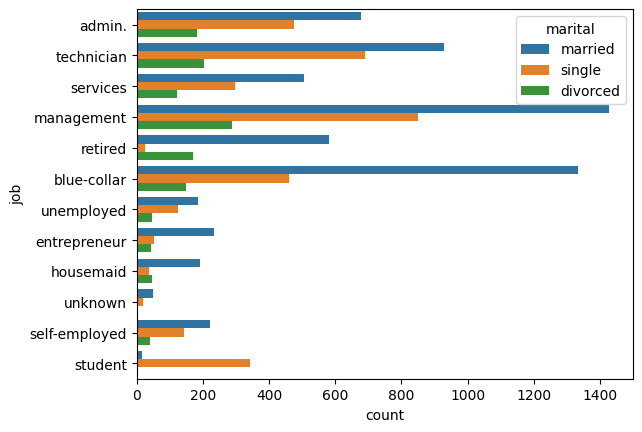

In [39]:
# Buatlah visualisasi yang menampilkan berapa banyak Job berdasarkan contactnya
sns.countplot(data=df5, y='job', hue="marital");

#### Visualisasi Distribution

<Axes: xlabel='age', ylabel='Count'>

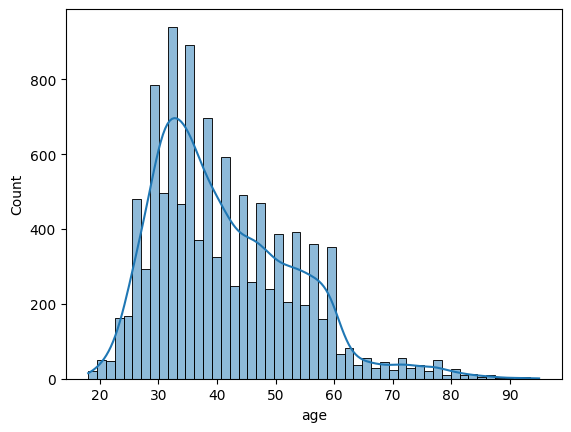

In [40]:
# Buatlah histogram untuk age
sns.histplot(data=df5, x="age", kde=True)

<Axes: xlabel='age'>

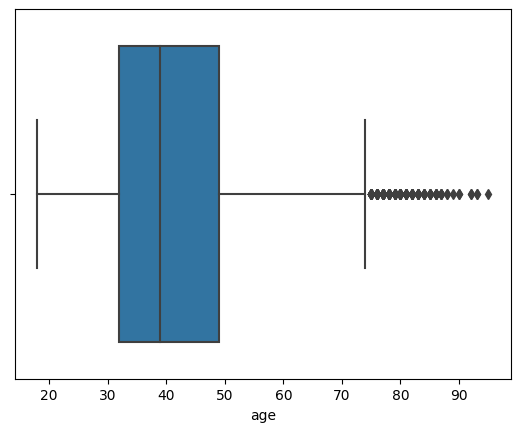

In [41]:
# Buatlah boxplot untuk age
sns.boxplot(data=df5,x="age")

#### Visualisasi Relationship

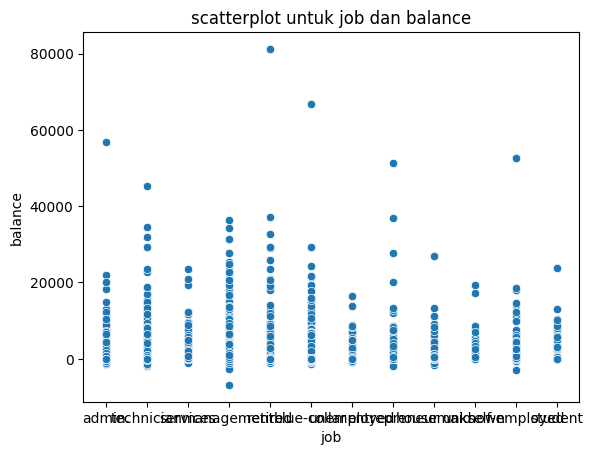

In [42]:
# Buatlah scatterplot untuk job dan balance
sns.scatterplot(data=df5,x="job", y="balance")
plt.title('scatterplot untuk job dan balance')
plt.show()

#### Visualisasi Composition

In [43]:
# Buatlah pieplot untuk Income Category
px.pie(df5,names="education")

## Data Preparation

##### Cleaning Data

In [30]:
df5.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

##### Transform Data

In [31]:
df_transformed = pd.get_dummies(df5, columns = ['marital', 'education','poutcome'])
df_transformed

,age,job,default,balance,housing,loan,contact,day,month,duration,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,admin.,no,2343,yes,no,unknown,5,may,1042,...,1,0,0,1,0,0,0,0,0,1
1,56,admin.,no,45,no,no,unknown,5,may,1467,...,1,0,0,1,0,0,0,0,0,1
2,41,technician,no,1270,yes,no,unknown,5,may,1389,...,1,0,0,1,0,0,0,0,0,1
3,55,services,no,2476,yes,no,unknown,5,may,579,...,1,0,0,1,0,0,0,0,0,1
4,54,admin.,no,184,no,no,unknown,5,may,673,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,no,1,yes,no,cellular,20,apr,257,...,0,1,1,0,0,0,0,0,0,1
11158,39,services,no,733,no,no,unknown,16,jun,83,...,1,0,0,1,0,0,0,0,0,1
11159,32,technician,no,29,no,no,cellular,19,aug,156,...,0,1,0,1,0,0,0,0,0,1
11160,43,technician,no,0,no,yes,cellular,8,may,9,...,1,0,0,1,0,0,1,0,0,0


##### Split Data

In [32]:
from sklearn.model_selection import train_test_split
x = df5.drop('loan',axis=1)
y = df5['loan']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train)

      age            job  marital  education default  balance housing  \
7968   57     technician  married  secondary      no      950     yes   
1456   34     technician   single   tertiary      no      925     yes   
361    41    blue-collar   single  secondary      no       75     yes   
812    46     technician   single   tertiary      no     4414      no   
1092   28        unknown   single  secondary      no     4465      no   
...   ...            ...      ...        ...     ...      ...     ...   
5734   47     management  married   tertiary      no      761     yes   
5191   28  self-employed   single   tertiary      no      159      no   
5390   35     technician  married  secondary      no     1144      no   
860    51        retired  married   tertiary      no      746      no   
7270   30     management   single   tertiary      no        2      no   

       contact  day month  duration  campaign  pdays  previous poutcome  \
7968  cellular    9   jul      1272         1   